In [1]:
from fetch_InsuranceLogic import *
from decode_InsuranceLogic import *
from smart_contract import *
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

{'status': '1', 'message': 'OK', 'result': [{'address': '0xbe035cf1367c45a0c9517969f5abdd3abf743ae7', 'topics': ['0xd5321498ebef1d048889992d8457d0f50576d300db1fd93488480c1f57a65601', '0x0000000000000000000000002cf8ed1664616483c12ef3113f6f62e68f1a810a'], 'data': '0x000000000000000000000000000000000000000000000000016345785d8a0000000000000000000000000000000000000000000000000000016345785d8a0000', 'blockNumber': '0x81fa5c', 'blockHash': '0x866ffef3530b5b6b953c61f57f14497beaf711383438f314e304835c95fdbf2b', 'timeStamp': '0x68482668', 'gasPrice': '0x5976982e', 'gasUsed': '0x21886', 'logIndex': '0x2f', 'transactionHash': '0xe828a55f90c669d98e3c4cd49ee26ef0313f8cd913895089d639b7f7fb1df7d3', 'transactionIndex': '0x21'}, {'address': '0xbe035cf1367c45a0c9517969f5abdd3abf743ae7', 'topics': ['0x04db3effc2d545417f6b20e7947f2639f4ab090973c42885d75a2801c3aba059', '0x0000000000000000000000000000000000000000000000000000000000000001', '0x000000000000000000000000d34a37613a382ba503f1599f514c9788df3659c4'], '

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Transaction Analysis

In [2]:
address_PricingLogic="0xb5a208E3d8c74464d7a70C9B7219880097c6DE81"
address_ModelPointsLogic="0xA1Ad49F8a7e8781A0488029eF7AC471901131Fce"
address_InsuranceLogic="0xbe035cf1367c45A0C9517969F5ABDd3abF743ae7"
#address_InsuranceLogic="0xAc5C296961837b4fb9d5CC08D9213D88C14c2882" Former address

In [3]:
import pandas as pd
transactions_df = pd.DataFrame(transactions['result'])
transactions_df

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName
0,8518222,1749558720,0xe4cac2112577781dd9db64b9141d2ba9497c5928854a...,101,0x0248b74756a2d92150cd44694493cb7e56b129b29027...,31,0xe8e79b8b8c0481fa33a8e0fca902ad5754bfe1c3,,0,3958691,1501121993,0,1,0x60806040526127106002556103e8600460006101000a...,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,6358722,3926362,72959,0x60806040,
1,8518236,1749558888,0xe828a55f90c669d98e3c4cd49ee26ef0313f8cd91389...,47,0x866ffef3530b5b6b953c61f57f14497beaf711383438...,33,0x2cf8ed1664616483c12ef3113f6f62e68f1a810a,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,100000000000000000,138478,1500944430,0,1,0xbd097e21,,2861696,137350,72945,0xbd097e21,fundContract()
2,8518243,1749558972,0xb1a6aeb2f6a30b65fe5357f52ff62c19e8aff0581b25...,54,0x11070f3d2702dff03e0a2bbcbf92351e13fea6fa3710...,19,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,886600000000000,777485,1500863178,0,1,0x206e2bcf000000000000000000000000000000000000...,,1670254,770205,72938,0x206e2bcf,
3,8518247,1749559020,0xebdf43d3c0686a77080cf1f89b562948cbb8af8a7d34...,55,0x6ae83aa79ed76cea5fb7341c5ecdf0557f418ef8cc16...,16,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,1001000000000000,574164,1500786561,0,1,0x206e2bcf000000000000000000000000000000000000...,,2346862,568485,72934,0x206e2bcf,
4,8518250,1749559056,0x5d0be8a6a2021dde59ac5286230b44285d130c69d451...,56,0xd157cdc585707d8bf3dfcf5ac66a0ba12930c7a008be...,22,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,1848000000000000,579880,1500910260,0,1,0x206e2bcf000000000000000000000000000000000000...,,2111472,574156,72931,0x206e2bcf,
5,8518256,1749559128,0xa8a9f9d311c544f9355e172c8f072ca3f4eb0159336b...,57,0xad4a28106e4f2525862b9e936632362c36fc9760c7d0...,27,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,572550000000000,583396,1501056923,0,1,0x206e2bcf000000000000000000000000000000000000...,,3369646,577644,72925,0x206e2bcf,
6,8518259,1749559164,0x863f3d427defc9f38254ceea5bb444c7f77263b61fd1...,58,0x68e8ee95a6869eb5ff668b8941840d1f4fdb050f1bdf...,12,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,1961850000000000,680210,1501022416,0,1,0x206e2bcf000000000000000000000000000000000000...,,1558488,673696,72922,0x206e2bcf,
7,8518265,1749559236,0xcb08e2c25830c0af81f056589b9b987cbdb3c6f69c5e...,59,0x3ccee5e54372c32e8f90f8f0c5076fa2ed2772a6bb94...,37,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,811800000000000,648632,1500933373,0,1,0x206e2bcf000000000000000000000000000000000000...,,11162175,642367,72916,0x206e2bcf,
8,8518270,1749559296,0xb01811a05caf5df09a03edf50168c86c52ab94caa868...,60,0x90bc9848a43e3c1363678f007e5b87ae2999ea978c06...,14,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,1623600000000000,510940,1501164117,0,1,0x206e2bcf000000000000000000000000000000000000...,,1372221,505759,72911,0x206e2bcf,
9,8518281,1749559428,0x34e12c68e3ac359e7714f09f68ba08a55df3db2336b8...,61,0xce0ce41511c95855a82bb9133f61bcb0eea2063a724f...,24,0xd34a37613a382ba503f1599f514c9788df3659c4,0xbe035cf1367c45a0c9517969f5abdd3abf743ae7,1895850000000000,649940,1501268265,0,1,0x206e2bcf000000000000000000000000000000000000...,,2368122,643664,72900,0x206e2bcf,


In [4]:
import pandas as pd

def generate_transaction_table_latex(df):
    """
    Generate LaTeX table code for the transactions DataFrame.

    Parameters:
    - df: pandas DataFrame (extracted transactions data).

    Returns:
    - str: LaTeX code for the table.
    """
    # Start LaTeX table
    latex_table = r"""
\begin{table}[h!]
\centering
\begin{tabular}{|l|l|l|l|}
\hline
\textbf{Variable Name} & \textbf{Type} & \textbf{Example Value} & \textbf{Description} \\ \hline
"""

    # Add rows for each column in the DataFrame
    for col in df.columns:
        col_type = df[col].dtype
        example_value = df[col].iloc[0] if not df[col].empty else "N/A"
        description = "Description not provided"  # Default description
        # Add the row to the LaTeX table
        latex_table += f"{col} & {col_type} & {str(example_value)} & {description} \\\\ \\hline\n"

    # End LaTeX table
    latex_table += r"""
\end{tabular}
\caption{Description of the transactions associated with the contract.}
\label{tab:transactions}
\end{table}
"""
    return latex_table

# Example: Assume transactions_df is already populated
# transactions_df = pd.DataFrame(transactions['result'])

# Generate LaTeX code for the transactions DataFrame
latex_code = generate_transaction_table_latex(transactions_df)
# print(latex_code)
from IPython.display import display, Markdown

# Display the LaTeX code as markdown
display(Markdown(f"```\n{latex_code}\n```"))


```

\begin{table}[h!]
\centering
\begin{tabular}{|l|l|l|l|}
\hline
\textbf{Variable Name} & \textbf{Type} & \textbf{Example Value} & \textbf{Description} \\ \hline
blockNumber & object & 8518222 & Description not provided \\ \hline
timeStamp & object & 1749558720 & Description not provided \\ \hline
hash & object & 0xe4cac2112577781dd9db64b9141d2ba9497c5928854a5f6397fdd5a07f56ca3a & Description not provided \\ \hline
nonce & object & 101 & Description not provided \\ \hline
blockHash & object & 0x0248b74756a2d92150cd44694493cb7e56b129b290278c13a47346be5c57ddb6 & Description not provided \\ \hline
transactionIndex & object & 31 & Description not provided \\ \hline
from & object & 0xe8e79b8b8c0481fa33a8e0fca902ad5754bfe1c3 & Description not provided \\ \hline
to & object &  & Description not provided \\ \hline
value & object & 0 & Description not provided \\ \hline
gas & object & 3958691 & Description not provided \\ \hline
gasPrice & object & 1501121993 & Description not provided \\ \hline
isError & object & 0 & Description not provided \\ \hline
txreceipt_status & object & 1 & Description not provided \\ \hline
input & object & 0x60806040526127106002556103e8600460006101000a81548161ffff021916908361ffff16021790555061649e600460026101000a81548161ffff021916908361ffff16021790555061287c6004806101000a81548161ffff021916908361ffff16021790555060006009556000600a556000600b556000600c556005600d553480156200008c57600080fd5b50604051620045bb380380620045bb8339818101604052810190620000b29190620001e6565b336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555081601160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555080601260006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050506200022d565b600080fd5b600073ffffffffffffffffffffffffffffffffffffffff82169050919050565b6000620001ae8262000181565b9050919050565b620001c081620001a1565b8114620001cc57600080fd5b50565b600081519050620001e081620001b5565b92915050565b600080604083850312156200020057620001ff6200017c565b5b60006200021085828601620001cf565b92505060206200022385828601620001cf565b9150509250929050565b61437e806200023d6000396000f3fe6080604052600436106101d15760003560e01c806367a10b1e116100f7578063a6bb7f9011610095578063bd097e2111610064578063bd097e211461069b578063cfb51928146106a5578063f7992d85146106e2578063f872bec01461070d576101d8565b8063a6bb7f90146105f1578063a752e1d61461061c578063ab4f971814610645578063b3d74b7414610670576101d8565b80638da5cb5b116100d15780638da5cb5b1461053557806395a25efa14610560578063962606331461059d5780639a9c29f6146105c8576101d8565b806367a10b1e146104b4578063794e5724146104df5780638ab510711461050a576101d8565b80632e1a7d4d1161016f57806354f703f81161013e57806354f703f8146103e4578063560171901461040f57806358d5a9611461044c578063677342ce14610477576101d8565b80632e1a7d4d14610326578063441238a1146103635780634c5054411461038e57806354e15497146103b9576101d8565b80631409005e116101ab5780631409005e1461028957806318160ddd146102b4578063206e2bcf146102df5780632d8ac61e146102fb576101d8565b80630e8a74d4146101dd5780630f919e0b14610208578063118ea06b14610245576101d8565b366101d857005b600080fd5b3480156101e957600080fd5b506101f2610738565b6040516101ff9190613193565b60405180910390f35b34801561021457600080fd5b5061022f600480360381019061022a9190613334565b61073e565b60405161023c9190613193565b60405180910390f35b34801561025157600080fd5b5061026c600480360381019061026791906133a3565b610849565b604051610280989796959493929190613463565b60405180910390f35b34801561029557600080fd5b5061029e6108cc565b6040516102ab9190613193565b60405180910390f35b3480156102c057600080fd5b506102c96108d2565b6040516102d69190613193565b60405180910390f35b6102f960048036038101906102f49190613334565b6108d8565b005b34801561030757600080fd5b5061031061169b565b60405161031d9190613193565b60405180910390f35b34801561033257600080fd5b5061034d600480360381019061034891906133a3565b6116a1565b60405161035a91906134fc565b60405180910390f35b34801561036f57600080fd5b506103786118bf565b6040516103859190613193565b60405180910390f35b34801561039a57600080fd5b506103a36118c5565b6040516103b09190613193565b60405180910390f35b3480156103c557600080fd5b506103ce6118cb565b6040516103db9190613576565b60405180910390f35b3480156103f057600080fd5b506103f96118f1565b6040516104069190613193565b60405180910390f35b34801561041b57600080fd5b50610436600480360381019061043191906135bd565b6118f7565b6040516104439190613193565b60405180910390f35b34801561045857600080fd5b5061046161190f565b60405161046e9190613193565b60405180910390f35b34801561048357600080fd5b5061049e600480360381019061049991906133a3565b611915565b6040516104ab9190613193565b60405180910390f35b3480156104c057600080fd5b506104c961198f565b6040516104d691906135ea565b60405180910390f35b3480156104eb57600080fd5b506104f46119a1565b6040516105019190613193565b60405180910390f35b34801561051657600080fd5b5061051f6119a7565b60405161052c91906135ea565b60405180910390f35b34801561054157600080fd5b5061054a6119bb565b6040516105579190613605565b60405180910390f35b34801561056c57600080fd5b50610587600480360381019061058291906133a3565b6119df565b6040516105949190613605565b60405180910390f35b3480156105a957600080fd5b506105b2611a1e565b6040516105bf9190613193565b60405180910390f35b3480156105d457600080fd5b506105ef60048036038101906105ea9190613620565b611a24565b005b3480156105fd57600080fd5b50610606612363565b6040516106139190613193565b60405180910390f35b34801561062857600080fd5b50610643600480360381019061063e919061368c565b612369565b005b34801561065157600080fd5b5061065a61274f565b6040516106679190613193565b60405180910390f35b34801561067c57600080fd5b50610685612755565b6040516106929190613700565b60405180910390f35b6106a361277b565b005b3480156106b157600080fd5b506106cc60048036038101906106c7919061371b565b612963565b6040516106d99190613764565b60405180910390f35b3480156106ee57600080fd5b506106f761298c565b60405161070491906135ea565b60405180910390f35b34801561071957600080fd5b506107226129a0565b60405161072f9190613193565b60405180910390f35b600b5481565b600080601160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16633074edbb86866040518363ffffffff1660e01b815260040161079e9291906137fe565b602060405180830381865afa1580156107bb573d6000803e3d6000fd5b505050506040513d601f19601f820116820180604052508101906107df9190613843565b9050600061271082856107f2919061389f565b6107fc9190613910565b90506000612710600460009054906101000a900461ffff1661ffff166127106108259190613941565b83610830919061389f565b61083a9190613910565b90508093505050509392505050565b600f6020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154908060030154908060040154908060050160009054906101000a900461ffff16908060060154908060070160009054906101000a900460ff16905088565b60065481565b60015481565b6000601160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16633074edbb85856040518363ffffffff1660e01b81526004016109379291906137fe565b602060405180830381865afa158015610954573d6000803e3d6000fd5b505050506040513d601f19601f820116820180604052508101906109789190613843565b90506000612710828461098b919061389f565b6109959190613910565b90506000612710600460009054906101000a900461ffff1661ffff166127106109be9190613941565b836109c9919061389f565b6109d39190613910565b9050803414610a17576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401610a0e906139c1565b60405180910390fd5b60056000815480929190610a2a906139e1565b919050555060003073ffffffffffffffffffffffffffffffffffffffff1634604051610a5590613a5a565b60006040518083038185875af1925050503d8060008114610a92576040519150601f19603f3d011682016040523d82523d6000602084013e610a97565b606091505b5050905080610adb576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401610ad290613ae1565b60405180910390fd5b601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16638e4e16a8878987896040518563ffffffff1660e01b8152600401610b3c9493929190613b01565b600060405180830381600087803b158015610b5657600080fd5b505af1158015610b6a573d6000803e3d6000fd5b5050505061271080600460009054906101000a900461ffff1661ffff168787610b93919061389f565b610b9d919061389f565b610ba79190613910565b610bb19190613910565b60096000828254610bc29190613941565b9250508190555084600c6000828254610bdb9190613941565b92505081905550601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16631409005e6040518163ffffffff1660e01b8152600401602060405180830381865afa158015610c4f573d6000803e3d6000fd5b505050506040513d601f19601f82011682018060405250810190610c739190613843565b600681905550600d546006541015610c9c57600c54600781905550600c54600881905550610fc8565b6000601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663ad5365fc6040518163ffffffff1660e01b8152600401602060405180830381865afa158015610d0b573d6000803e3d6000fd5b505050506040513d601f19601f82011682018060405250810190610d2f9190613843565b9050610d3a81611915565b600a819055506000601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16631b729d8e6040518163ffffffff1660e01b8152600401602060405180830381865afa158015610daf573d6000803e3d6000fd5b505050506040513d601f19601f82011682018060405250810190610dd39190613843565b9050600a54600a54600a5483610de99190613910565b610df39190613910565b610dfd9190613910565b600b819055506009546006600b54600a54610e18919061389f565b610e229190613910565b600661271080600460029054906101000a900461ffff1661ffff16600460029054906101000a900461ffff1661ffff16600b54600a54610e62919061389f565b610e6c919061389f565b610e76919061389f565b610e809190613910565b610e8a9190613910565b610e949190613910565b612710600460029054906101000a900461ffff1661ffff16600a54610eb9919061389f565b610ec39190613910565b610ecd9190613941565b610ed79190613b4d565b610ee19190613b4d565b6007819055506009546006600b54600a54610efc919061389f565b610f069190613910565b60066127108060048054906101000a900461ffff1661ffff1660048054906101000a900461ffff1661ffff16600b54600a54610f42919061389f565b610f4c919061389f565b610f56919061389f565b610f609190613910565b610f6a9190613910565b610f749190613910565b61271060048054906101000a900461ffff1661ffff16600a54610f97919061389f565b610fa19190613910565b610fab9190613941565b610fb59190613b4d565b610fbf9190613b4d565b60088190555050505b6000806040518061010001604052803373ffffffffffffffffffffffffffffffffffffffff1681526020018a81526020016110028a612963565b8152602001888152602001878152602001600460009054906101000a900461ffff1661ffff1681526020018581526020018360ff168152509050600754600354116115515760039150818160e0019060ff16908160ff1681525050601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663533247606005546040518263ffffffff1660e01b81526004016110ba9190613bcd565b600060405180830381600087803b1580156110d457600080fd5b505af11580156110e8573d6000803e3d6000fd5b505050506110f633856129a6565b61271080600460009054906101000a900461ffff1661ffff16898961111b919061389f565b611125919061389f565b61112f9190613910565b6111399190613910565b6009600082825461114a9190613b4d565b9250508190555086600c60008282546111639190613b4d565b92505081905550601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16631409005e6040518163ffffffff1660e01b8152600401602060405180830381865afa1580156111d7573d6000803e3d6000fd5b505050506040513d601f19601f820116820180604052508101906111fb9190613843565b600681905550600d54600654101561122457600c54600781905550600c54600881905550611550565b6000601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663ad5365fc6040518163ffffffff1660e01b8152600401602060405180830381865afa158015611293573d6000803e3d6000fd5b505050506040513d601f19601f820116820180604052508101906112b79190613843565b90506112c281611915565b600a819055506000601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16631b729d8e6040518163ffffffff1660e01b8152600401602060405180830381865afa158015611337573d6000803e3d6000fd5b505050506040513d601f19601f8201168201806040525081019061135b9190613843565b9050600a54600a54600a54836113719190613910565b61137b9190613910565b6113859190613910565b600b819055506009546006600b54600a546113a0919061389f565b6113aa9190613910565b600661271080600460029054906101000a900461ffff1661ffff16600460029054906101000a900461ffff1661ffff16600b54600a546113ea919061389f565b6113f4919061389f565b6113fe919061389f565b6114089190613910565b6114129190613910565b61141c9190613910565b612710600460029054906101000a900461ffff1661ffff16600a54611441919061389f565b61144b9190613910565b6114559190613941565b61145f9190613b4d565b6114699190613b4d565b6007819055506009546006600b54600a54611484919061389f565b61148e9190613910565b60066127108060048054906101000a900461ffff1661ffff1660048054906101000a900461ffff1661ffff16600b54600a546114ca919061389f565b6114d4919061389f565b6114de919061389f565b6114e89190613910565b6114f29190613910565b6114fc9190613910565b61271060048054906101000a900461ffff1661ffff16600a5461151f919061389f565b6115299190613910565b6115339190613941565b61153d9190613b4d565b6115479190613b4d565b60088190555050505b5b80600f6000600554815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155606082015181600301556080820151816004015560a08201518160050160006101000a81548161ffff021916908361ffff16021790555060c0820151816006015560e08201518160070160006101000a81548160ff021916908360ff1602179055509050503373ffffffffffffffffffffffffffffffffffffffff166005547f04db3effc2d545417f6b20e7947f2639f4ab090973c42885d75a2801c3aba0598b61166c8c612963565b8b89886007546008546040516116889796959493929190613bfb565b60405180910390a3505050505050505050565b600c5481565b600081601060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015611725576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040161171c90613cb6565b60405180910390fd5b600061271060025484611738919061389f565b6117429190613910565b9050806007546003546117559190613b4d565b1015611796576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040161178d90613d22565b60405180910390fd5b82601060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282546117e59190613b4d565b9250508190555082600160008282546117fe9190613b4d565b9250508190555080600360008282546118179190613b4d565b925050819055503373ffffffffffffffffffffffffffffffffffffffff166108fc829081150290604051600060405180830381858888f19350505050158015611864573d6000803e3d6000fd5b503373ffffffffffffffffffffffffffffffffffffffff167f49995e5dd6158cf69ad3e9777c46755a1a826a446c6416992167462dad033b2a82856040516118ad929190613d42565b60405180910390a26001915050919050565b60055481565b60025481565b601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b61271081565b60106020528060005260406000206000915090505481565b60075481565b6000600382111561197c57819050600060016002846119349190613910565b61193e9190613941565b90505b8181101561197657809150600281828561195b9190613910565b6119659190613941565b61196f9190613910565b9050611941565b5061198a565b6000821461198957600190505b5b919050565b60048054906101000a900461ffff1681565b60085481565b600460029054906101000a900461ffff1681565b60008054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b600e81815481106119ef57600080fd5b906000526020600020016000915054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b600d5481565b6000600f60008481526020019081526020016000209050600073ffffffffffffffffffffffffffffffffffffffff168160000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1603611ace576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401611ac590613db7565b60405180910390fd5b60008054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614611b5c576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401611b5390613e23565b60405180910390fd5b60008160070160009054906101000a900460ff1660ff1614611bb3576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401611baa90613e8f565b60405180910390fd5b601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166353324760846040518263ffffffff1660e01b8152600401611c0e9190613efb565b600060405180830381600087803b158015611c2857600080fd5b505af1158015611c3c573d6000803e3d6000fd5b50505050612710808260050160009054906101000a900461ffff1661ffff1683600301548460040154611c6f919061389f565b611c79919061389f565b611c839190613910565b611c8d9190613910565b60096000828254611c9e9190613b4d565b925050819055508060030154600c6000828254611cbb9190613b4d565b92505081905550601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16631409005e6040518163ffffffff1660e01b8152600401602060405180830381865afa158015611d2f573d6000803e3d6000fd5b505050506040513d601f19601f82011682018060405250810190611d539190613843565b600681905550600d546006541015611d7c57600c54600781905550600c546008819055506120a8565b6000601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663ad5365fc6040518163ffffffff1660e01b8152600401602060405180830381865afa158015611deb573d6000803e3d6000fd5b505050506040513d601f19601f82011682018060405250810190611e0f9190613843565b9050611e1a81611915565b600a819055506000601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16631b729d8e6040518163ffffffff1660e01b8152600401602060405180830381865afa158015611e8f573d6000803e3d6000fd5b505050506040513d601f19601f82011682018060405250810190611eb39190613843565b9050600a54600a54600a5483611ec99190613910565b611ed39190613910565b611edd9190613910565b600b819055506009546006600b54600a54611ef8919061389f565b611f029190613910565b600661271080600460029054906101000a900461ffff1661ffff16600460029054906101000a900461ffff1661ffff16600b54600a54611f42919061389f565b611f4c919061389f565b611f56919061389f565b611f609190613910565b611f6a9190613910565b611f749190613910565b612710600460029054906101000a900461ffff1661ffff16600a54611f99919061389f565b611fa39190613910565b611fad9190613941565b611fb79190613b4d565b611fc19190613b4d565b6007819055506009546006600b54600a54611fdc919061389f565b611fe69190613910565b60066127108060048054906101000a900461ffff1661ffff1660048054906101000a900461ffff1661ffff16600b54600a54612022919061389f565b61202c919061389f565b612036919061389f565b6120409190613910565b61204a9190613910565b6120549190613910565b61271060048054906101000a900461ffff1661ffff16600a54612077919061389f565b6120819190613910565b61208b9190613941565b6120959190613b4d565b61209f9190613b4d565b60088190555050505b600582106121ac576120e28160000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1682600301546129a6565b60018160070160006101000a81548160ff021916908360ff16021790555061212b816003015482600401548360050160009054906101000a900461ffff1661ffff166001612a9a565b8060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16837fd89b40d7797c5d84114de0fd6658e14755f88d7f1155e198aa2f61e678626b47600160075460085460405161219f93929190613f29565b60405180910390a3612272565b6121d7816003015482600401548360050160009054906101000a900461ffff1661ffff166000612a9a565b60028160070160006101000a81548160ff021916908360ff1602179055508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16837fd89b40d7797c5d84114de0fd6658e14755f88d7f1155e198aa2f61e678626b47600060075460085460405161226993929190613f29565b60405180910390a35b600854600354101561235e57612286612b75565b6000600354111561229a57612299612fb0565b5b600060078190555060006008819055506000600a8190555060006009819055506000600b8190555061271060028190555060006003819055506000600681905550601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16632fdd00306040518163ffffffff1660e01b8152600401600060405180830381600087803b15801561234557600080fd5b505af1158015612359573d6000803e3d6000fd5b505050505b505050565b60035481565b60008054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16146123f7576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004016123ee90613fd2565b60405180910390fd5b82600460006101000a81548161ffff021916908361ffff16021790555081600460026101000a81548161ffff021916908361ffff160217905550806004806101000a81548161ffff021916908361ffff160217905550600d546006541061261b576009546006600b54600a5461246d919061389f565b6124779190613910565b600661271080600460029054906101000a900461ffff1661ffff16600460029054906101000a900461ffff1661ffff16600b54600a546124b7919061389f565b6124c1919061389f565b6124cb919061389f565b6124d59190613910565b6124df9190613910565b6124e99190613910565b612710600460029054906101000a900461ffff1661ffff16600a5461250e919061389f565b6125189190613910565b6125229190613941565b61252c9190613b4d565b6125369190613b4d565b6007819055506009546006600b54600a54612551919061389f565b61255b9190613910565b60066127108060048054906101000a900461ffff1661ffff1660048054906101000a900461ffff1661ffff16600b54600a54612597919061389f565b6125a1919061389f565b6125ab919061389f565b6125b59190613910565b6125bf9190613910565b6125c99190613910565b61271060048054906101000a900461ffff1661ffff16600a546125ec919061389f565b6125f69190613910565b6126009190613941565b61260a9190613b4d565b6126149190613b4d565b6008819055505b60085460035410156127075761262f612b75565b6000600354111561264357612642612fb0565b5b600060078190555060006008819055506000600a8190555060006009819055506000600b8190555061271060028190555060006003819055506000600681905550601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16632fdd00306040518163ffffffff1660e01b8152600401600060405180830381600087803b1580156126ee57600080fd5b505af1158015612702573d6000803e3d6000fd5b505050505b7fc2634585bb8a35bf193b0cc1835da15a0282d26cc3c425bc6dde17073c2280a0838383600754600854604051612742959493929190613ff2565b60405180910390a1505050565b60095481565b601160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b600034116127be576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004016127b5906140b7565b60405180910390fd5b6000600254612710346127d1919061389f565b6127db9190613910565b905080600160008282546127ef9190613941565b9250508190555034600360008282546128089190613941565b925050819055506000601060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054036128ba57600e339080600181540180825580915050600190039060005260206000200160009091909190916101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055505b80601060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282546129099190613941565b925050819055503373ffffffffffffffffffffffffffffffffffffffff167fd5321498ebef1d048889992d8457d0f50576d300db1fd93488480c1f57a656013483604051612958929190613d42565b60405180910390a250565b600080829050600081510361297e576000801b915050612987565b60208301519150505b919050565b600460009054906101000a900461ffff1681565b600a5481565b804710156129e9576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004016129e090614123565b60405180910390fd5b60008273ffffffffffffffffffffffffffffffffffffffff1682604051612a0f90613a5a565b60006040518083038185875af1925050503d8060008114612a4c576040519150601f19603f3d011682016040523d82523d6000602084013e612a51565b606091505b5050905080612a95576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401612a8c906141b5565b60405180910390fd5b505050565b60006127108486612aab919061389f565b612ab59190613910565b9050600061271084612710612aca9190613941565b83612ad5919061389f565b612adf9190613910565b90508215612b1e578060036000828254612af99190613941565b925050819055508560036000828254612b129190613b4d565b92505081905550612b38565b8060036000828254612b309190613941565b925050819055505b600060015411612b49576001612b67565b600154612710600354612b5c919061389f565b612b669190613910565b5b600281905550505050505050565b47600381905550600060035411612bc1576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401612bb890614221565b60405180910390fd5b6000806000600190505b6005548111612c48576000600f600083815260200190815260200160002060070160009054906101000a900460ff1660ff1603612c3557600f60008281526020019081526020016000206006015483612c249190613941565b92508180612c31906139e1565b9250505b8080612c40906139e1565b915050612bcb565b5060008211612c8c576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401612c839061428d565b60405180910390fd5b8160035410612e1f576000600190505b6005548111612e19576000600f600083815260200190815260200160002060070160009054906101000a900460ff1660ff1603612e06576000600f60008381526020019081526020016000206006015490506003600f600084815260200190815260200160002060070160006101000a81548160ff021916908360ff160217905550601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166353324760836040518263ffffffff1660e01b8152600401612d799190613bcd565b600060405180830381600087803b158015612d9357600080fd5b505af1158015612da7573d6000803e3d6000fd5b50505050612deb600f600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16826129a6565b8060036000828254612dfd9190613b4d565b92505081905550505b8080612e11906139e1565b915050612c9c565b50612fac565b6000600190505b6005548111612fa2576000600f600083815260200190815260200160002060070160009054906101000a900460ff1660ff1603612f8f57600083600354600f600085815260200190815260200160002060060154612e84919061389f565b612e8e9190613910565b90506003600f600084815260200190815260200160002060070160006101000a81548160ff021916908360ff160217905550601260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166353324760836040518263ffffffff1660e01b8152600401612f1b9190613bcd565b600060405180830381600087803b158015612f3557600080fd5b505af1158015612f49573d6000803e3d6000fd5b50505050612f8d600f600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16826129a6565b505b8080612f9a906139e1565b915050612e26565b5060006003819055505b5050565b47600381905550600060035411612ffc576040517f08c379a0000000000000000000000000000000000000000000000000000000008152600401612ff3906142f9565b60405180910390fd5b60005b600e8054905081101561311b576000600e828154811061302257613021614319565b5b9060005260206000200160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690506000600154600354601060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546130a1919061389f565b6130ab9190613910565b90506000601060008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555060008111156131065761310582826129a6565b5b50508080613113906139e1565b915050612fff565b5060006003819055506000600181905550600e600061313a919061313c565b565b508054600082559060005260206000209081019061315a919061315d565b50565b5b8082111561317657600081600090555060010161315e565b5090565b6000819050919050565b61318d8161317a565b82525050565b60006020820190506131a86000830184613184565b92915050565b6000604051905090565b600080fd5b600080fd5b6131cb8161317a565b81146131d657600080fd5b50565b6000813590506131e8816131c2565b92915050565b600080fd5b600080fd5b6000601f19601f8301169050919050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052604160045260246000fd5b613241826131f8565b810181811067ffffffffffffffff821117156132605761325f613209565b5b80604052505050565b60006132736131ae565b905061327f8282613238565b919050565b600067ffffffffffffffff82111561329f5761329e613209565b5b6132a8826131f8565b9050602081019050919050565b82818337600083830152505050565b60006132d76132d284613284565b613269565b9050828152602081018484840111156132f3576132f26131f3565b5b6132fe8482856132b5565b509392505050565b600082601f83011261331b5761331a6131ee565b5b813561332b8482602086016132c4565b91505092915050565b60008060006060848603121561334d5761334c6131b8565b5b600061335b868287016131d9565b935050602084013567ffffffffffffffff81111561337c5761337b6131bd565b5b61338886828701613306565b9250506040613399868287016131d9565b9150509250925092565b6000602082840312156133b9576133b86131b8565b5b60006133c7848285016131d9565b91505092915050565b600073ffffffffffffffffffffffffffffffffffffffff82169050919050565b60006133fb826133d0565b9050919050565b61340b816133f0565b82525050565b6000819050919050565b61342481613411565b82525050565b600061ffff82169050919050565b6134418161342a565b82525050565b600060ff82169050919050565b61345d81613447565b82525050565b600061010082019050613479600083018b613402565b613486602083018a613184565b613493604083018961341b565b6134a06060830188613184565b6134ad6080830187613184565b6134ba60a0830186613438565b6134c760c0830185613184565b6134d460e0830184613454565b9998505050505050505050565b60008115159050919050565b6134f6816134e1565b82525050565b600060208201905061351160008301846134ed565b92915050565b6000819050919050565b600061353c613537613532846133d0565b613517565b6133d0565b9050919050565b600061354e82613521565b9050919050565b600061356082613543565b9050919050565b61357081613555565b82525050565b600060208201905061358b6000830184613567565b92915050565b61359a816133f0565b81146135a557600080fd5b50565b6000813590506135b781613591565b92915050565b6000602082840312156135d3576135d26131b8565b5b60006135e1848285016135a8565b91505092915050565b60006020820190506135ff6000830184613438565b92915050565b600060208201905061361a6000830184613402565b92915050565b60008060408385031215613637576136366131b8565b5b6000613645858286016131d9565b9250506020613656858286016131d9565b9150509250929050565b6136698161342a565b811461367457600080fd5b50565b60008135905061368681613660565b92915050565b6000806000606084860312156136a5576136a46131b8565b5b60006136b386828701613677565b93505060206136c486828701613677565b92505060406136d586828701613677565b9150509250925092565b60006136ea82613543565b9050919050565b6136fa816136df565b82525050565b600060208201905061371560008301846136f1565b92915050565b600060208284031215613731576137306131b8565b5b600082013567ffffffffffffffff81111561374f5761374e6131bd565b5b61375b84828501613306565b91505092915050565b6000602082019050613779600083018461341b565b92915050565b600081519050919050565b600082825260208201905092915050565b60005b838110156137b957808201518184015260208101905061379e565b60008484015250505050565b60006137d08261377f565b6137da818561378a565b93506137ea81856020860161379b565b6137f3816131f8565b840191505092915050565b60006040820190506138136000830185613184565b818103602083015261382581846137c5565b90509392505050565b60008151905061383d816131c2565b92915050565b600060208284031215613859576138586131b8565b5b60006138678482850161382e565b91505092915050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052601160045260246000fd5b60006138aa8261317a565b91506138b58361317a565b92508282026138c38161317a565b915082820484148315176138da576138d9613870565b5b5092915050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052601260045260246000fd5b600061391b8261317a565b91506139268361317a565b925082613936576139356138e1565b5b828204905092915050565b600061394c8261317a565b91506139578361317a565b925082820190508082111561396f5761396e613870565b5b92915050565b7f496e636f7272656374207072656d69756d20616d6f756e742073656e74000000600082015250565b60006139ab601d8361378a565b91506139b682613975565b602082019050919050565b600060208201905081810360008301526139da8161399e565b9050919050565b60006139ec8261317a565b91507fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff8203613a1e57613a1d613870565b5b600182019050919050565b600081905092915050565b50565b6000613a44600083613a29565b9150613a4f82613a34565b600082019050919050565b6000613a6582613a37565b9150819050919050565b7f4661696c656420746f207472616e73666572207072656d69756d20746f20726560008201527f7365727665000000000000000000000000000000000000000000000000000000602082015250565b6000613acb60258361378a565b9150613ad682613a6f565b604082019050919050565b60006020820190508181036000830152613afa81613abe565b9050919050565b60006080820190508181036000830152613b1b81876137c5565b9050613b2a6020830186613184565b613b376040830185613184565b613b446060830184613184565b95945050505050565b6000613b588261317a565b9150613b638361317a565b9250828203905081811115613b7b57613b7a613870565b5b92915050565b7f63616e63656c6c65640000000000000000000000000000000000000000000000600082015250565b6000613bb760098361378a565b9150613bc282613b81565b602082019050919050565b6000604082019050613be26000830184613184565b8181036020830152613bf381613baa565b905092915050565b600060e082019050613c10600083018a613184565b613c1d602083018961341b565b613c2a6040830188613184565b613c376060830187613184565b613c446080830186613454565b613c5160a0830185613184565b613c5e60c0830184613184565b98975050505050505050565b7f496e73756666696369656e742062616c616e6365000000000000000000000000600082015250565b6000613ca060148361378a565b9150613cab82613c6a565b602082019050919050565b60006020820190508181036000830152613ccf81613c93565b9050919050565b7f496e73756666696369656e7420636f6e74726163742062616c616e6365000000600082015250565b6000613d0c601d8361378a565b9150613d1782613cd6565b602082019050919050565b60006020820190508181036000830152613d3b81613cff565b9050919050565b6000604082019050613d576000830185613184565b613d646020830184613184565b9392505050565b7f496e76616c696420636f6e747261637420494400000000000000000000000000600082015250565b6000613da160138361378a565b9150613dac82613d6b565b602082019050919050565b60006020820190508181036000830152613dd081613d94565b9050919050565b7f4e6f7420617574686f72697a6564000000000000000000000000000000000000600082015250565b6000613e0d600e8361378a565b9150613e1882613dd7565b602082019050919050565b60006020820190508181036000830152613e3c81613e00565b9050919050565b7f436f6e7472616374206973206e6f742061637469766500000000000000000000600082015250565b6000613e7960168361378a565b9150613e8482613e43565b602082019050919050565b60006020820190508181036000830152613ea881613e6c565b9050919050565b7f636c6f7365640000000000000000000000000000000000000000000000000000600082015250565b6000613ee560068361378a565b9150613ef082613eaf565b602082019050919050565b6000604082019050613f106000830184613184565b8181036020830152613f2181613ed8565b905092915050565b6000606082019050613f3e60008301866134ed565b613f4b6020830185613184565b613f586040830184613184565b949350505050565b7f4f6e6c7920746865206f776e65722063616e2075706461746520706172616d6560008201527f7465727300000000000000000000000000000000000000000000000000000000602082015250565b6000613fbc60248361378a565b9150613fc782613f60565b604082019050919050565b60006020820190508181036000830152613feb81613faf565b9050919050565b600060a0820190506140076000830188613438565b6140146020830187613438565b6140216040830186613438565b61402e6060830185613184565b61403b6080830184613184565b9695505050505050565b7f46756e64696e6720616d6f756e74206d7573742062652067726561746572207460008201527f68616e2030000000000000000000000000000000000000000000000000000000602082015250565b60006140a160258361378a565b91506140ac82614045565b604082019050919050565b600060208201905081810360008301526140d081614094565b9050919050565b7f496e73756666696369656e74207265736572766520666f72207061796f757400600082015250565b600061410d601f8361378a565b9150614118826140d7565b602082019050919050565b6000602082019050818103600083015261413c81614100565b9050919050565b7f4661696c656420746f2073656e64207061796f757420746f20706f6c6963796860008201527f6f6c646572000000000000000000000000000000000000000000000000000000602082015250565b600061419f60258361378a565b91506141aa82614143565b604082019050919050565b600060208201905081810360008301526141ce81614192565b9050919050565b7f4e6f7468696e6720746f20726566756e64000000000000000000000000000000600082015250565b600061420b60118361378a565b9150614216826141d5565b602082019050919050565b6000602082019050818103600083015261423a816141fe565b9050919050565b7f4e6f2061637469766520706f6c696369657320746f20726566756e6400000000600082015250565b6000614277601c8361378a565b915061428282614241565b602082019050919050565b600060208201905081810360008301526142a68161426a565b9050919050565b7f4e6f7468696e6720746f20646973747269627574650000000000000000000000600082015250565b60006142e360158361378a565b91506142ee826142ad565b602082019050919050565b60006020820190508181036000830152614312816142d6565b9050919050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052603260045260246000fdfea2646970667358221220ff2bbe94c00de8c15bfe7785bad1ce8b9cc9449e46f30ac103c19448d96e9fed64736f6c63430008130033000000000000000000000000b5a208e3d8c74464d7a70c9b7219880097c6de81000000000000000000000000a1ad49f8a7e8781a0488029ef7ac471901131fce & Description not provided \\ \hline
contractAddress & object & 0xbe035cf1367c45a0c9517969f5abdd3abf743ae7 & Description not provided \\ \hline
cumulativeGasUsed & object & 6358722 & Description not provided \\ \hline
gasUsed & object & 3926362 & Description not provided \\ \hline
confirmations & object & 72959 & Description not provided \\ \hline
methodId & object & 0x60806040 & Description not provided \\ \hline
functionName & object &  & Description not provided \\ \hline

\end{tabular}
\caption{Description of the transactions associated with the contract.}
\label{tab:transactions}
\end{table}

```

## Cost of the transactions

0.017797699987730117

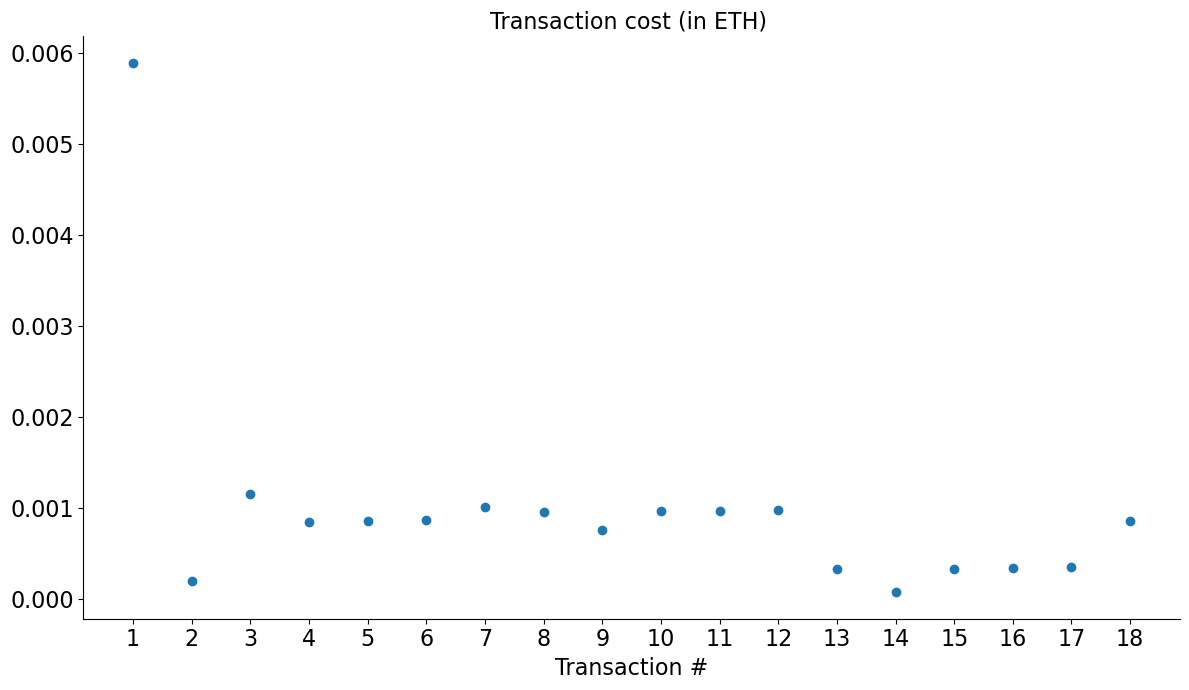

In [5]:
plt.figure(figsize=(12, 7))
transaction_costs = np.array([int(transactions_df.iloc[k]["gasUsed"]) * int(transactions_df.iloc[k]["gasPrice"]) / 1e18 for k in range(len(transactions_df))])
plt.scatter(np.arange(1, len(transaction_costs) +1 , 1), transaction_costs)
# Add custom x-axis labels
plt.xlabel("Transaction #", fontsize=16)
plt.title("Transaction cost (in ETH) ", fontsize=16)

# Add custom x-axis labels
plt.xticks(np.arange(1, len(transaction_costs) +1 , 1), np.arange(1, len(transaction_costs) +1 , 1), fontsize=16)
plt.yticks(fontsize=16)
# Adjust layout to fit everything nicely
plt.tight_layout()
sns.despine()
plt.savefig("../../figures/transaction_cost.pdf")
np.sum(transaction_costs)


# Event log analysis

In [6]:
decoded_events = [decode_event(event, event_signature_hashes_dict) for event in events['result']]

Construction of the stochastic processes:
- $X_t$
- $B_t$
- $SCR_t$
- $MCR_t$
- $Y_t^{(i)}$ $i = 1, 2 ,3$
- $Z_t$ be the vector of the ETH balance of the addresses of the owner, surplus provider and policyholder


In [7]:
tau = np.array([datetime.fromtimestamp(timestamp) for timestamp in np.array(transactions_df['timeStamp']).astype(int)])
addresses = np.array(transactions_df['from'])

Xt, Bt, SCRt, MCRt, rt, etat, sn2, mu, gamma_1_unormalized, qSCR, qMCR = [0], [0], [0], [0], [1], [0.1], [0], [0], [0], [2.5758], [1.0364]
Zt = {"0xE8e79B8B8c0481fa33a8E0fcA902ad5754BfE1C3".lower(): [0.0],
    "0x2CF8ed1664616483c12Ef3113f6F62E68f1a810A".lower(): [0.0],
    "0xd34a37613A382bA503f1599F514C9788dF3659C4".lower():[0.0] 
    
    }

address_role = {"0xE8e79B8B8c0481fa33a8E0fcA902ad5754BfE1C3".lower(): "Owner",
    "0x2CF8ed1664616483c12Ef3113f6F62E68f1a810A".lower(): "Surplus Provider",
    "0xd34a37613A382bA503f1599F514C9788dF3659C4".lower(): "Policyholder",
    }

Yt = {}
for address in np.unique(addresses):
    Yt[address]= [0]
Y = [0]

PTF = []

event_names = []
liquidation = True



In [8]:
for decoded_event in decoded_events:
    event_names.append(decoded_event["event"])
    print(decoded_event)
    if decoded_event["event"] == "Fund": 
        x, y = decoded_event["x"] / 10**18, decoded_event["y"] / 10**18
        Xt.append(Xt[-1] + x)
        Bt.append(Bt[-1] + x)
        SCRt.append(SCRt[-1])
        MCRt.append(MCRt[-1])
        rt.append(rt[-1])
        etat.append(etat[-1])
        for address in np.unique(addresses):
            if address == decoded_event["investor_address"]:
                Yt[address].append(Yt[address][-1] + y)
                Zt[address].append(Zt[address][-1] - x)
            
            else:
                Yt[address].append(Yt[address][-1])
                Zt[address].append(Zt[address][-1])
        Y.append(Y[-1] + y)

    elif decoded_event["event"] == "InsuranceUnderwritten": 
        contractId = decoded_event["contractId"]
        T, station, l, cp, status = decoded_event["T"], decoded_event["station"], decoded_event["l"] / 10**18, decoded_event["cp"] / 10**18, decoded_event["status"]
        SCR, MCR = decoded_event["SCR"] / 10**18, decoded_event["MCR"] / 10**18
        eta = etat[-1]
        Xt.append(Xt[-1])
        Bt.append(Bt[-1] + cp)
        PTF.append({"contractId": contractId ,"address":decoded_event["customer_address"], "T":T, "station":station, "l": l, "cp": cp, "status": 0})
        SCRt.append(SCR), MCRt.append(MCR)
        rt.append(rt[-1])
        qSCR.append(qSCR[-1])
        qMCR.append(qMCR[-1])
        for address in np.unique(addresses):
            Yt[address].append(Yt[address][-1])
            if address == decoded_event["customer_address"]:
                Zt[address].append(Zt[address][-1] - cp)
            else:
                Zt[address].append(Zt[address][-1])

    elif decoded_event["event"] == "ParametersUpdated":
        Xt.append(Xt[-1])
        Bt.append(Bt[-1])
        rt.append(rt[-1])
        for address in np.unique(addresses):
            Yt[address].append(Yt[address][-1])
            Zt[address].append(Zt[address][-1])
        Y.append(Y[-1])
        etat.append(decoded_event["eta"] / 10**4)
        qSCR.append(decoded_event["qAlphaSCR"] / 10**4)
        qMCR.append(decoded_event["qAlphaMCR"] / 10**4)
        SCRt.append(SCR / 10**18)
        MCRt.append(MCR / 10**18)
        

    elif decoded_event["event"] == "ClaimSettled":
        SCR, MCR = decoded_event["SCR"] / 10**18, decoded_event["MCR"] / 10**18
        policy = PTF[decoded_event["contractId"] -1]
        cp, l = policy["cp"], policy["l"]
        SCRt.append(SCR)
        MCRt.append(MCR)
        if decoded_event["payoutTransfered"]:
            Xt.append(Xt[-1] - l + cp)
            Bt.append(Bt[-1] - l)
            PTF[decoded_event["contractId"] -1]["status"] = 1
            for address in np.unique(addresses):
                Yt[address].append(Yt[address][-1])
                if address == decoded_event["customer_address"]:
                    Zt[address].append(Zt[address][-1] + l)
                else:
                    Zt[address].append(Zt[address][-1])

        else:
            Xt.append(Xt[-1] + cp)
            Bt.append(Bt[-1])
            PTF[decoded_event["contractId"] -1]["status"] = 2
            for address in np.unique(addresses):
                Yt[address].append(Yt[address][-1])
                Zt[address].append(Zt[address][-1])
        
        Y.append(Y[-1])
        rt.append( Xt[-1] / Y[-1])
        qSCR.append(qSCR[-1])
        qMCR.append(qMCR[-1])
        
    elif decoded_event["event"] == "Burn":
        x = decoded_event["x"] / 10**18
        y = decoded_event["y"] / 10**18
        Xt.append(Xt[-1] - x)
        Bt.append(Bt[-1] - x)
        SCRt.append(SCRt[-1])
        MCRt.append(MCRt[-1])
        rt.append(rt[-1])
        etat.append(etat[-1])
        qSCR.append(qSCR[-1])
        qMCR.append(qMCR[-1])
        for address in np.unique(addresses):
            if address == decoded_event["investor_address"]:
                Yt[address].append(Yt[address][-1] - y)
                Zt[address].append(Zt[address][-1] + x)
            
            else:
                Yt[address].append(Yt[address][-1])
                Zt[address].append(Zt[address][-1])
        Y.append(Y[-1] - y)



{'event': 'Fund', 'investor_address': '0x2cf8ed1664616483c12ef3113f6f62e68f1a810a', 'x': 100000000000000000, 'y': 100000000000000000}
{'event': 'InsuranceUnderwritten', 'contractId': 1, 'customer_address': '0xd34a37613a382ba503f1599f514c9788df3659c4', 'T': 60, 'station': 'MARSEILLE-MARIGNANE', 'l': 10000000000000000, 'cp': 886600000000000, 'status': 0, 'SCR': 10000000000000000, 'MCR': 10000000000000000}
{'event': 'InsuranceUnderwritten', 'contractId': 2, 'customer_address': '0xd34a37613a382ba503f1599f514c9788df3659c4', 'T': 60, 'station': 'STRASBOURG-ENTZHEIM', 'l': 10000000000000000, 'cp': 1001000000000000, 'status': 0, 'SCR': 20000000000000000, 'MCR': 20000000000000000}
{'event': 'InsuranceUnderwritten', 'contractId': 3, 'customer_address': '0xd34a37613a382ba503f1599f514c9788df3659c4', 'T': 45, 'station': 'MARSEILLE-MARIGNANE', 'l': 20000000000000000, 'cp': 1848000000000000, 'status': 0, 'SCR': 40000000000000000, 'MCR': 40000000000000000}
{'event': 'InsuranceUnderwritten', 'contractI

In [9]:
if liquidation:
    event_names.append("Refund")
    # Refund
    total_refund = 0
    total_redistribution = 0
    refunded_addresses = []
    for policy in PTF:
        if policy["status"] == 0:
            refunded_addresses.append(policy["address"])
            cp = policy["cp"]
            total_refund += cp
            
            policy["status"] = 3
    Zt[policy["address"]].append(Zt[policy["address"]][-1] + cp)
    for address in np.unique(addresses):
        Yt[address].append(Yt[address][-1])
        if address not in refunded_addresses:
            Zt[address].append(Zt[address][-1])
    Bt.append(Bt[-1] - total_refund)
    Xt.append(Bt[-1])
    Y.append(Y[-1])
    rt.append(Xt[-1] / Y[-1])
    SCRt.append(0)
    MCRt.append(0)   
    # Redistribution 
    event_names.append("Redistribute")
    for address in list(Yt.keys()):
        x = Yt[address][-1] * rt[-1]
        total_redistribution += x
        Zt[address].append(Zt[address][-1] + x)                                  
        Yt[address].append(0)
    Y.append(0)
    Xt.append(0)
    Bt.append(Bt[-1] - total_redistribution)
    rt.append(1)
    SCRt.append(0)
    MCRt.append(0)




np.array(Xt), np.array(Bt)

(array([0.        , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.101848  , 0.066204  , 0.0570906 ,
        0.0480916 , 0.04366415, 0.045626  , 0.045626  , 0.        ]),
 array([0.        , 0.1       , 0.1008866 , 0.1018876 , 0.1037356 ,
        0.10430815, 0.10627   , 0.1070818 , 0.1087054 , 0.11060125,
        0.11119195, 0.11222155, 0.11222155, 0.07657755, 0.06657755,
        0.05657755, 0.05157755, 0.05157755, 0.045626  , 0.        ]))

# Plot of the account balances

In [10]:
event_names
dict_event_names = {
    "Fund": "Fund",
    "InsuranceUnderwritten": "Underwrite",
    "ParametersUpdated": "Update",
    "ClaimSettled": "Settle",
    "Burn": "Burn",
    "Refund": "Refund",
    "Redistribute": "Redistribute",
}
event_names_short = [dict_event_names[event] for event in event_names]


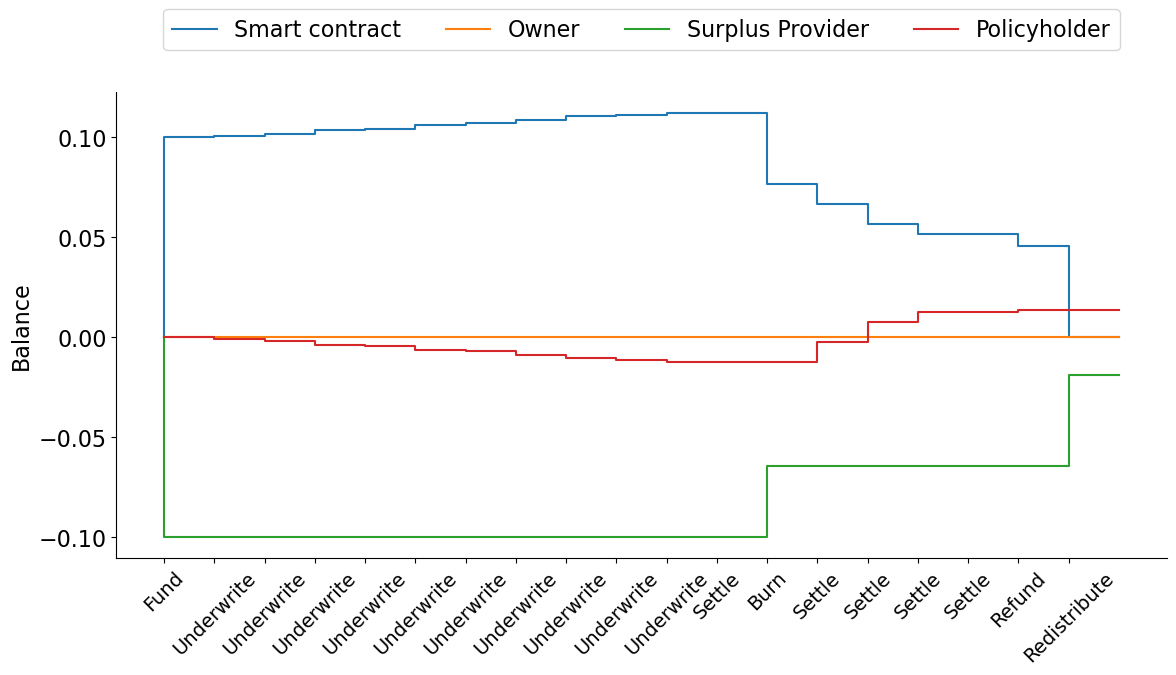

In [11]:

plt.figure(figsize=(12, 7))
plt.step(np.arange(1, len(Bt)+1, 1), Bt, label="Smart contract") 
# plt.scatter(np.arange(1, len(Bt) + 1), Bt, zorder=3)
for address in list(Zt.keys()):
    plt.step(np.arange(1, len(Zt[address])+1, 1), Zt[address], label=address_role[address])
plt.ylabel("Balance", fontsize=16)

# Add custom x-axis labels
plt.xticks(np.arange(1, len(event_names_short) + 1), event_names_short, rotation=45, fontsize=14)
plt.yticks(fontsize=16)

plt.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=4)

# Adjust layout to fit everything nicely
plt.tight_layout()
sns.despine()
plt.savefig("../../figures/balance.pdf")

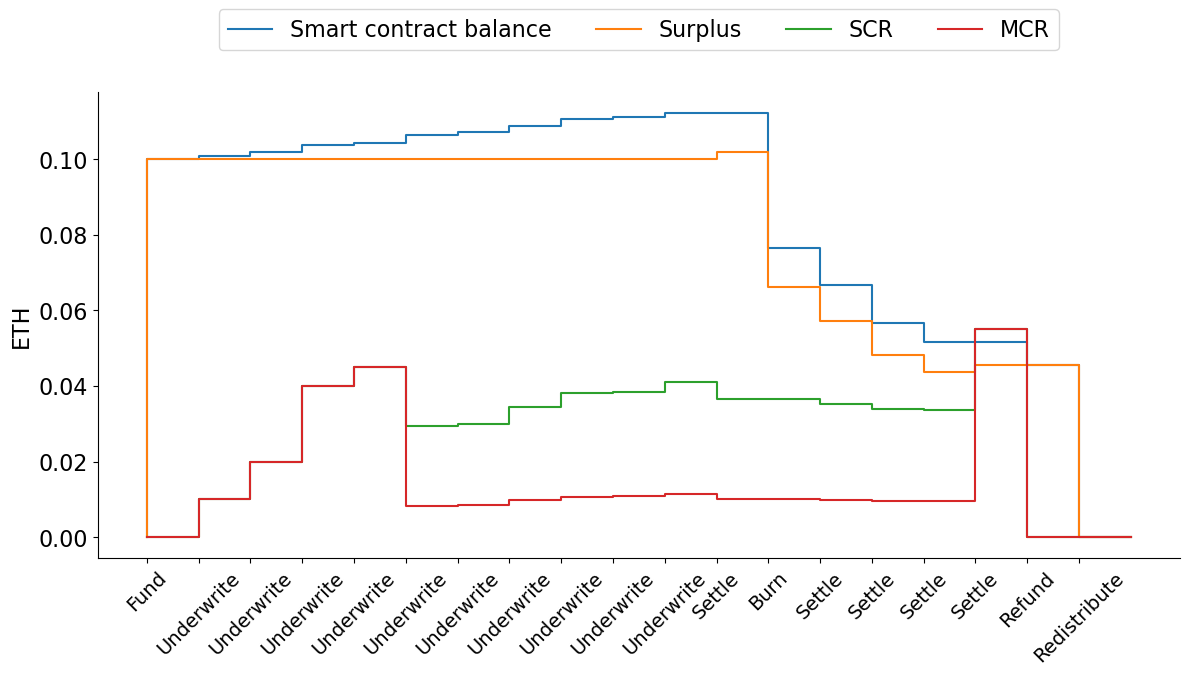

In [12]:
plt.figure(figsize=(12, 7))
plt.step(np.arange(1, len(Bt)+1, 1), Bt, label="Smart contract balance") 
plt.step(np.arange(1, len(Bt)+1, 1), Xt, label="Surplus")
plt.step(np.arange(1, len(Bt)+1, 1), SCRt, label="SCR")
plt.step(np.arange(1, len(Bt)+1, 1), MCRt, label="MCR")
plt.ylabel("ETH", fontsize=16)

# Add custom x-axis labels
plt.xticks(np.arange(1, len(event_names_short) + 1), event_names_short, rotation=45, fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=4)

# Adjust layout to fit everything nicely
plt.tight_layout()
sns.despine()
plt.savefig("../../figures/surplus.pdf")